# Portfolio Optimization Analysis

## Introduction
In this analysis, we explore portfolio optimization with a focus on 40 stocks that echo the S&P 500's sector distribution. We'll evaluate their performance and optimize portfolios for maximum Sharpe ratio, return, and minimal risk. A comparative view will highlight shifts from the original S&P 500 sector distribution, offering insights into the balancing act between risk and return within optimized portfolios.

## Load and Analyze the Data
First, let's load the dataset, wich consists of selected 40 stocks representing the S&P 500 index's sector-wise weight distribution. We'll analyze the data to gain insights into the stocks and their respective sectors.

In [1]:
# Load the data
import pandas as pd

stocks_data = pd.read_csv("data/stocks_data.csv")

# Display the first few rows of the DataFrame
stocks_data.head()


,company_name,symbol,sector
0,Apple Inc.,AAPL,Technology
1,Microsoft Corporation,MSFT,Technology
2,\tAlphabet Inc.,GOOG,Communication Services
3,"\tAmazon.com, Inc.",AMZN,Consumer Discretionary
4,Nvidia Corporation,NVDA,Technology


We can see that the dataset contains information about the companies name, stock symbol and sector.

## Distribution of Stocks by Sector
We can visualize the sector-wise distribution of the selected stocks using a pie chart. This visualization helps us understand the initial sector allocations before optimizing the portfolio (assuming each stock have the same weight).

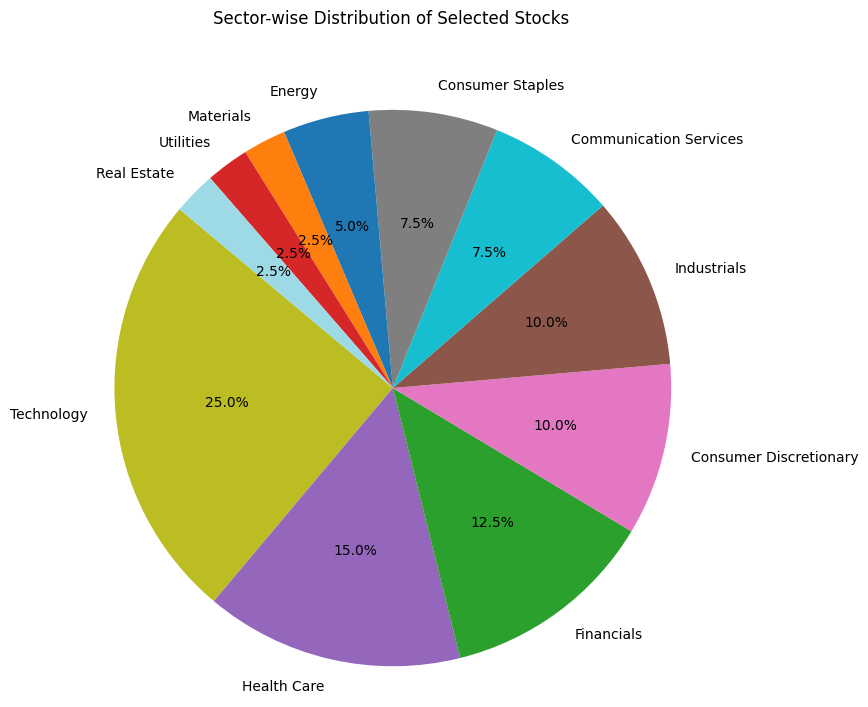

In [2]:
# Plotting the initial distribution by sector
import matplotlib.pyplot as plt
from colors import sector_colors

sector_counts = stocks_data.sector.value_counts()

plt.figure(figsize=(8,8))
plt.pie(sector_counts, labels=sector_counts.index, autopct="%1.1f%%", startangle=140, 
        colors=[sector_colors[sector] for sector in sector_counts.index])
plt.title("Sector-wise Distribution of Selected Stocks", y=1.08)
plt.axis("equal")
plt.show()


From the pie chart, it is evident that the Technology sector commands a significant portion of the portfolio, with a **25% weight**. Health Care and Financials follow, constituting **15% and 12.5%** of the portfolio, respectively. These sectors are pivotal in the portfolio's performance due to their substantial allocation. On the flip side, **Real Estate, Utilities, and Materials are the less represented sectors, each holding a 2.5% weight**. This distribution underscores the portfolio’s diverse yet strategic allocation across various sectors.

## Fetch Historical Stock Data
Next, we gather historical stock data. We'll use this data to calculate the **stocks' returns**, wich are essential in portfolio optimization.



In [5]:
# Fetch historical stock data
import yfinance as yf
from datetime import date, timedelta

# Setting the date range (last 10 years)
years = 10
end_date = pd.to_datetime(date.today())
start_date = end_date - timedelta(days=years*365)

# Fetching the data
stocks_symbols = stocks_data.symbol
stocks_price = pd.DataFrame()

for symbol in stocks_symbols:
    stock_data = yf.download(symbol, start=start_date, end=end_date)
    stocks_price[symbol] = stock_data["Close"]

# Displaying the fetched data
stocks_price.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

,AAPL,MSFT,GOOG,AMZN,NVDA,TSLA,META,BRK-B,V,JPM,...,CAN,NFLX,LIN,AMD,NEE,PLD,UPS,RTX,HON,BA
Date,,,,,,,,,,,,,,,,,,,,,
2013-10-14,17.715714,34.450001,21.820959,15.535000,3.8725,11.981333,49.509998,116.000000,48.360001,52.709999,...,NaN,46.337143,122.250000,3.97,20.264999,38.970001,90.360001,67.275017,81.970711,119.459999
2013-10-15,17.809999,34.490002,21.967909,15.320000,3.8525,12.262667,49.500000,114.629997,47.842499,52.310001,...,NaN,45.955715,121.099998,4.02,20.052500,39.009998,90.279999,66.582756,81.169884,118.180000
2013-10-16,17.896786,34.639999,22.366913,15.524500,3.9000,12.237333,51.139999,116.690002,48.907501,54.000000,...,NaN,46.125713,123.169998,4.09,20.377501,39.980000,91.330002,66.979233,81.751434,120.339996
2013-10-17,18.017857,34.919998,22.136776,15.538500,3.9075,12.186667,52.209999,116.919998,49.570000,54.209999,...,NaN,47.157143,124.400002,4.09,20.750000,40.040001,91.919998,67.979858,82.695274,122.290001
2013-10-18,18.174643,34.959999,25.190828,16.446501,3.9525,12.226667,54.220001,116.970001,50.112499,54.299999,...,NaN,47.642857,124.940002,3.53,20.885000,39.820000,93.000000,67.803650,80.635994,122.519997


## Calculate Returns and Correlation
Now, let's calculate the average daily returns and the correlation between the stocks. These calculations are fundamental steps in determining the optimal weights for our portfolio.

In [6]:
# Calculate average daily return for each stock
daily_returns = stocks_price.pct_change()
avg_daily_return = daily_returns.mean()

# Annualize returns
annualized_returns = (1 + avg_daily_return) ** 252 - 1

# Create correlation matrix to measure relationships between stock returns
correlation_matrix = daily_returns.corr()

# Displaying the correlation matrix
correlation_matrix.head()

,AAPL,MSFT,GOOG,AMZN,NVDA,TSLA,META,BRK-B,V,JPM,...,CAN,NFLX,LIN,AMD,NEE,PLD,UPS,RTX,HON,BA
AAPL,1.000000,0.662107,0.594961,0.534747,0.548741,0.414647,0.523950,0.520306,0.556850,0.435233,...,0.253355,0.406535,0.489379,0.407020,0.339347,0.453984,0.431941,0.386243,0.485721,0.403332
MSFT,0.662107,1.000000,0.705428,0.622347,0.603046,0.396457,0.556575,0.549147,0.619186,0.459873,...,0.221264,0.443720,0.536098,0.408899,0.387189,0.497048,0.452747,0.401711,0.520840,0.384184
GOOG,0.594961,0.705428,1.000000,0.639287,0.536903,0.372333,0.637053,0.505507,0.573916,0.428901,...,0.250926,0.458431,0.464437,0.354539,0.317319,0.429477,0.407897,0.387035,0.475642,0.387617
AMZN,0.534747,0.622347,0.639287,1.000000,0.497798,0.390566,0.573087,0.370823,0.473223,0.302248,...,0.241951,0.503081,0.333583,0.383367,0.244828,0.368768,0.371317,0.244252,0.322903,0.291353
NVDA,0.548741,0.603046,0.536903,0.497798,1.000000,0.410459,0.474841,0.401970,0.488715,0.361126,...,0.288430,0.409425,0.410738,0.571133,0.252081,0.382143,0.389571,0.301772,0.395515,0.342332


Observing the **correlation matrix**, it's notable that stocks within the same sector exhibit varying degrees of correlation. For instance, **Google (GOOG)** and **Microsoft (MSFT)**, both technology giants, have a substantial correlation of **0.705**, indicative of a strong positive relationship. In contrast, **Tesla (TSLA)** and **Amazon (AMZN)**, although categorized under the Consumer Discretionary sector, display a relatively low correlation of **0.39**. This disparity stems from their operational niches - Tesla in the **automobile industry** and Amazon in **e-commerce** - leading to distinct performance patterns.

## Portfolio Optimization
We aim to find the **optimal weights** for the stocks in our portfolio to achieve **maximum Sharpe ratio, maximum return**, and **minimum risk**. We use a **randomization approach** to generate numerous portfolios with random weights and select the optimal ones.



In [7]:
# Importing NumPy for numerical operations
import numpy as np

# Extracting the sectors of the selected stocks from the data
stocks_sectors = stocks_data.sector

# Create a dictionary to map symbols to sectors
symbol_to_sector = dict(zip(stocks_symbols, stocks_sectors))

# Find optimal portfolios varying weights using randomization
num_portfolios = 10000
results = np.zeros((3, num_portfolios))
portfolio_weights = []
portfolio_sector_weights = {}

for i in range(num_portfolios): 
  weights = np.random.random(len(stocks_symbols))
  weights /= np.sum(weights)  

  # Calculate portfolio annualized return
  portfolio_return = np.sum(weights * annualized_returns)

  # Calculate portfolio risk using correlation matrix and weights
  portfolio_risk = np.dot(weights.T, np.dot(correlation_matrix, weights))
  portfolio_risk = np.sqrt(portfolio_risk)

  # Calculate sector weights for the portfolio
  sector_weights = {sector: 0 for sector in stocks_sectors.unique()}
  for symbol, weight in zip(stocks_symbols, weights):
    sector = symbol_to_sector[symbol]
    sector_weights[sector] += weight

  # Store the portfolio's sector weights in the dictionary
  portfolio_sector_weights[i] = sector_weights
  
  results[0, i] = portfolio_return
  results[1, i] = portfolio_risk
  results[2, i] = portfolio_return / portfolio_risk
  portfolio_weights.append(weights)
  
# Create a DataFrame of the calculated portfolios
columns = ["Return", "Risk", "Sharpe Ratio"]
portfolios = pd.DataFrame(results.T, columns=columns)
stocks_weights = pd.DataFrame(portfolio_weights, columns=stocks_symbols)
sector_weights = pd.DataFrame(portfolio_sector_weights).T  # Transpose the DataFrame

# Find the portfolios with the maximum Sharpe ratio, maximum return, and minimum risk
max_sharpe_portfolio = portfolios.iloc[portfolios["Sharpe Ratio"].idxmax()]
max_return_portfolio = portfolios.iloc[portfolios["Return"].idxmax()]
min_risk_portfolio = portfolios.iloc[portfolios["Risk"].idxmin()]

